In [9]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=318389 sha256=de102226e8025b91c5a41420307ea7d11c55e83d39e335d4a6d61f4c65dc37c8
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [6]:
%load_ext rpy2.ipython

In [7]:
%%R
install.packages("readr")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpfluBWz/downloaded_packages’



In [8]:
%%R
library("readr")

In [9]:
%%R
install.packages("igraph")
install.packages("ggraph")
install.packages("ggthemes")
install.packages("dplyr")
install.packages("pander")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpfluBWz/downloaded_packages’

(as ‘lib’ is unspecified)
































































	‘/tmp/RtmpfluBWz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpfluBWz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpfluBWz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpfluBWz/downloaded_packages’



In [10]:
%%R
library("igraph")
library("ggraph")
library("ggthemes")
library("dplyr")
library("pander")

Attaching package: ‘igraph’



    decompose, spectrum



    union



Attaching package: ‘dplyr’



    as_data_frame, groups, union



    filter, lag



    intersect, setdiff, setequal, union




In [151]:
%%R
graficar <- function(dataframe,nombre,s){


    intenciones<-c('Difamar','Crear alarma',"Hibrida")



    g <- graph.data.frame(dataframe,directed = F)
    V(g)$color<-ifelse(is.na(match(attr(V(g),which="names"),intenciones)),"lightblue","orange")
    f<-plot.igraph(g,
            vertex.size=degree(g,mode = "in")*s, # Tamaño de nodo
            edge.arrow.size=0.2, # tamaño de flecha de la arista
            edge.arrow.width=0.6, # ancho de flecha de la arista
            edge.color="black", # color de arista
            edge.curved = T, # arista curva
            vertex.label.cex=0.8, # tamaño de las etiquetas de los nodos
            main=paste("Relación Emociones e Intensiones ",nombre), 
            vertex.label.color="black", # color de las etiquetas de los nodos
            vertex.color=V(g)$color, # color de nodos
            #vertex.label.family="arial"
            )
  
    g
}


In [12]:
%%R
estadisticas <- function(grafico){
  g <- degree(grafico,mode = "out") 
  b <- betweenness(graph = grafico)  
  c <- closeness(grafico, vids = V(grafico), mode = "out")
  aus <- authority_score(grafico)$vector
  e = eccentricity(grafico, mode = "out")
  resultado <- data.frame(
      "degree"=g,
      "betweenness"=b,
      "closeness"=c,
      "autorithy score"=aus,
      "eccentricity"=e)
  
  m <- mean_distance(grafico)
  d<-diameter(grafico)
  ed <- edge_density(grafico, loops = FALSE)
  t<-transitivity(grafico)
  r<-reciprocity(grafico)
  resultadoG <- data.frame(
      "mean distance"=m,
      "diameter"=d,
      "edge density"=ed,
      "transitivity"=t,
      "reciprocity"=r
      )

  print(resultado)
  
  print("----Metricas Generales----")
  print(resultadoG)
  resultado
}


## Corona Fake

### Eng

In [152]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

coronaFEng <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/60/AprioriMappingcoronaEngF60TAllSP.csv')


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.
New names:
• `` -> `...1`
Rows: 58 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (3): intention, emocion, intentionPercent
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [153]:
%%R
df = coronaFEng[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))
print(tbl_df(df), n=40)

# A tibble: 58 × 3
   intention    emocion   intentionPercent
   <chr>        <chr>                <dbl>
 1 Crear alarma Miedo                0.780
 2 Crear alarma Tristeza             0.610
 3 Crear alarma Enojo                0.317
 4 Crear alarma Miedo                0.317
 5 Crear alarma Enojo                0.293
 6 Crear alarma Tristeza             0.293
 7 Crear alarma Disgusto             0.366
 8 Crear alarma Miedo                0.366
 9 Crear alarma Disgusto             0.366
10 Crear alarma Tristeza             0.366
11 Crear alarma Miedo                0.610
12 Crear alarma Tristeza             0.610
13 Crear alarma Confianza            0.268
14 Crear alarma Miedo                0.268
15 Crear alarma Confianza            0.268
16 Crear alarma Tristeza             0.268
17 Difamar      Miedo                0.340
18 Difamar      Tristeza             0.340
19 Hibrida      Enojo                0.297
20 Hibrida      Miedo                0.297
21 Hibrida      Enojo              

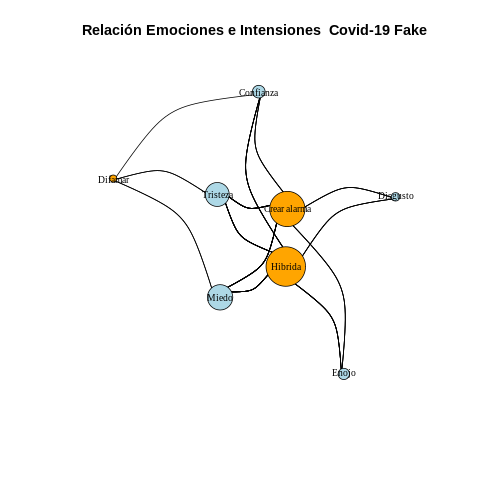

In [154]:
%%R

graf <- graficar(df,"Covid-19 Fake",1)

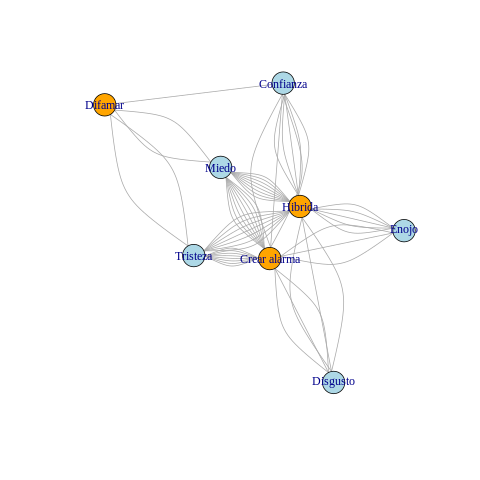

In [155]:
%%R
plot(graf)

In [156]:
%%R
a = estadisticas(graf)

             degree betweenness  closeness autorithy.score eccentricity
Crear alarma     25  4.97802690 0.11111111       0.9491545            2
Difamar           5  0.09534798 0.07692308       0.2122959            3
Hibrida          28  6.92662512 0.11111111       1.0000000            2
Miedo            18  2.23108715 0.09090909       0.6558347            2
Tristeza         17  2.05934412 0.09090909       0.6148907            2
Enojo             8  0.09433962 0.07692308       0.3213069            3
Disgusto          6  0.05660377 0.07692308       0.2394188            3
Confianza         9  0.55862534 0.09090909       0.3299992            2
[1] "----Metricas Generales----"
  mean.distance diameter edge.density transitivity reciprocity
1      1.607143        3     2.071429            0           1


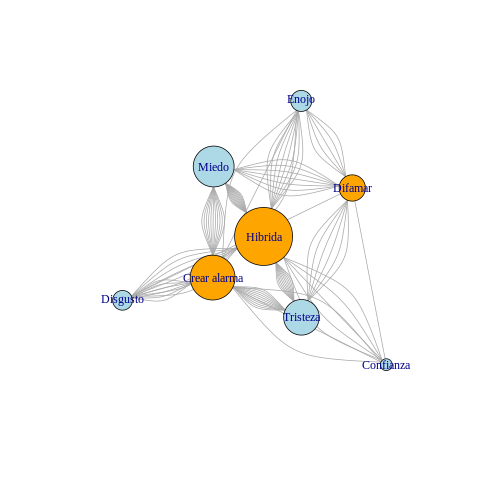

In [180]:
%%R
h=unlist(a['degree'])
plot(graf, vertex.size=h*1)

### Esp

In [ ]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

coronaFEsp <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/AprioriMappingcoronaEspF60T.csv')


In [ ]:
%%R
df = coronaFEsp[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))
print(tbl_df(df), n=40)

In [ ]:
%%R
graf <- graficar(df,"Corona Fake Esp",4)

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
estadisticas(graf)

## Politic


### Eng

In [158]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

politicFEng <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/60/AprioriMappingpoliticEngF60TAllSP.csv')


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.
New names:
• `` -> `...1`
Rows: 30 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (3): intention, emocion, intentionPercent
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [159]:
%%R
df = politicFEng[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))
print(tbl_df(df), n=40)

# A tibble: 30 × 3
   intention    emocion  intentionPercent
   <chr>        <chr>               <dbl>
 1 Crear alarma Disgusto           0.251 
 2 Crear alarma Miedo              0.251 
 3 Crear alarma Disgusto           0.251 
 4 Crear alarma Tristeza           0.251 
 5 Crear alarma Miedo              0.324 
 6 Crear alarma Tristeza           0.324 
 7 Difamar      Enojo              0.0776
 8 Difamar      Miedo              0.0776
 9 Hibrida      Enojo              0.224 
10 Hibrida      Disgusto           0.224 
11 Hibrida      Enojo              0.265 
12 Hibrida      Miedo              0.265 
13 Hibrida      Disgusto           0.407 
14 Hibrida      Miedo              0.407 
15 Hibrida      Disgusto           0.387 
16 Hibrida      Tristeza           0.387 
17 Hibrida      Miedo              0.387 
18 Hibrida      Tristeza           0.387 
19 Crear alarma Disgusto           0.251 
20 Crear alarma Tristeza           0.251 
21 Crear alarma Miedo              0.251 
22 Difamar     

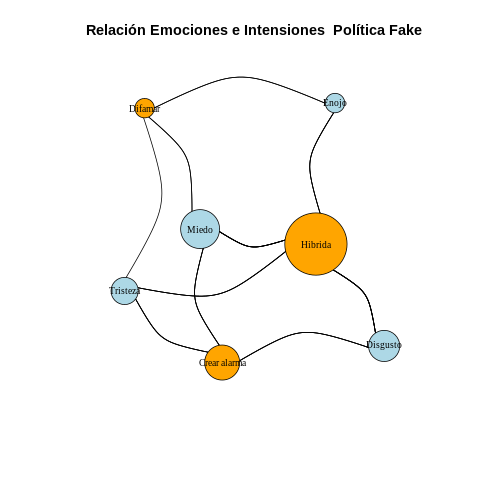

In [160]:
%%R
graf <- graficar(df,"Política Fake",3)

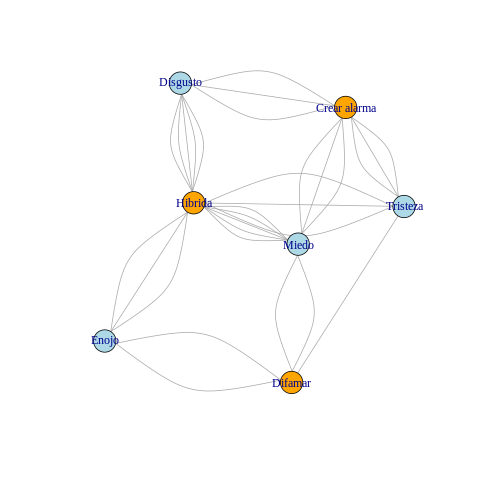

In [161]:
%%R
plot(graf)

In [162]:
%%R
a = estadisticas(graf)

             degree betweenness  closeness autorithy.score eccentricity
Crear alarma      9   1.2071712 0.10000000       0.5966868            3
Difamar           5   0.6026009 0.10000000       0.2783286            3
Hibrida          16   6.1902279 0.12500000       1.0000000            2
Disgusto          8   0.7179487 0.09090909       0.5593343            3
Miedo            10   2.5571971 0.11111111       0.6051891            2
Tristeza          7   1.1631631 0.11111111       0.4175108            2
Enojo             5   0.5616911 0.09090909       0.2929812            3
[1] "----Metricas Generales----"
  mean.distance diameter edge.density transitivity reciprocity
1      1.619048        3     1.428571            0           1


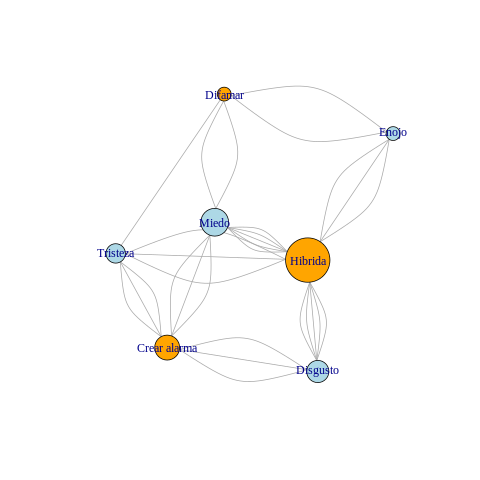

In [163]:
%%R
h=unlist(a['degree'])
plot(graf, vertex.size=h*2)

### Esp

In [ ]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

politicFEsp <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/AprioriMappingpoliticEspF60T.csv')


In [ ]:
%%R
df = politicFEsp[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))
print(tbl_df(df), n=40)

In [ ]:
%%R
graf <- graficar(df,"Politic Fake Esp",4)

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
estadisticas(graf)

## Gossip

### Eng

In [182]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

gossipFEng <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/60/AprioriMappinggossipEngF60TAllSP.csv')


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.
New names:
• `` -> `...1`
Rows: 10 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (3): intention, emocion, intentionPercent
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [183]:
%%R
df = gossipFEng[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))
print(tbl_df(df), n=40)

# A tibble: 10 × 3
   intention emocion  intentionPercent
   <chr>     <chr>               <dbl>
 1 Difamar   Disgusto           0.0561
 2 Difamar   Enojo              0.108 
 3 Difamar   Miedo              0.108 
 4 Difamar   Enojo              0.0601
 5 Difamar   Tristeza           0.0601
 6 Difamar   Tristeza           0.0807
 7 Difamar   Miedo              0.0807
 8 Difamar   Enojo              0.0601
 9 Difamar   Tristeza           0.0601
10 Difamar   Miedo              0.0601


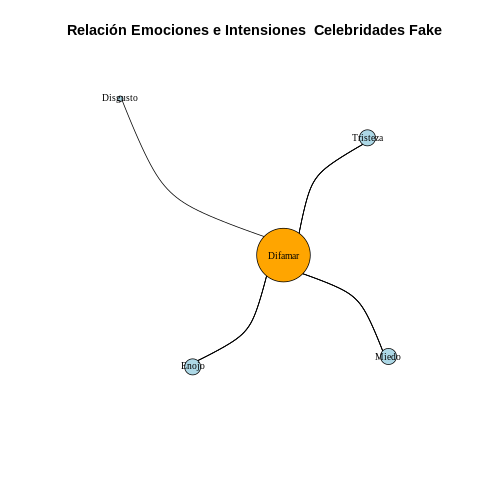

In [184]:
%%R
graf <- graficar(df,"Celebridades Fake",4)

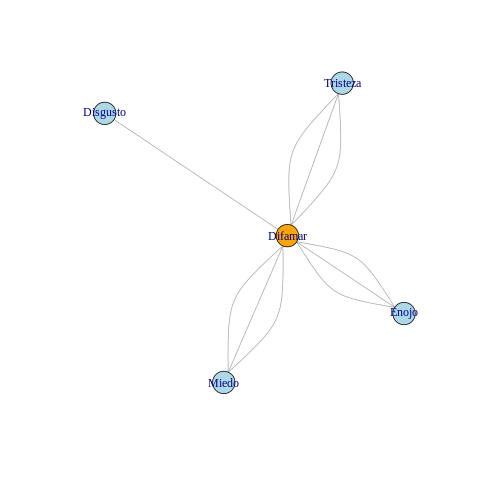

In [187]:
%%R
plot(graf)

In [168]:
%%R
a = estadisticas(graf)

         degree betweenness closeness autorithy.score eccentricity
Difamar      10           6 0.2500000       0.0000000            1
Disgusto      1           0 0.1428571       0.3333333            2
Enojo         3           0 0.1428571       1.0000000            2
Miedo         3           0 0.1428571       1.0000000            2
Tristeza      3           0 0.1428571       1.0000000            2
[1] "----Metricas Generales----"
  mean.distance diameter edge.density transitivity reciprocity
1           1.6        2            1            0           1


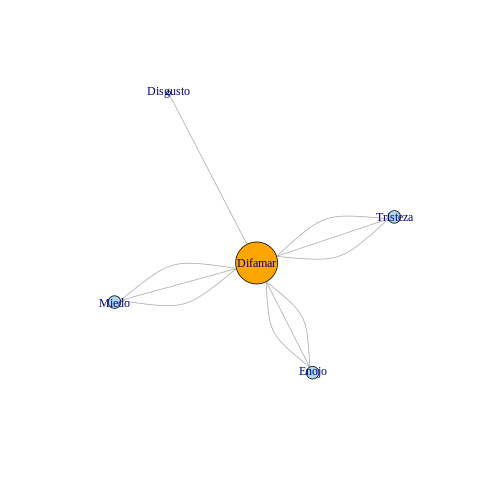

In [169]:
%%R
h=unlist(a['degree'])
plot(graf, vertex.size=h*3)

### Esp

In [ ]:
%%R
#https://drive.google.com/file/d/1-yHPUuzGZUtlfmDEhGAgqGyrEOl8W52h/view?usp=sharing

gossipFEsp <- read_csv2('/content/drive/MyDrive/fakeNewsNet/Intenciones/Apriori/Mapping/AprioriMappinggossipEspF60T.csv')


In [ ]:
%%R
df = gossipFEsp[c("intention","emocion","intentionPercent")]
df = transform(df,intentionPercent = as.numeric(intentionPercent))

print(tbl_df(df), n=40)

In [ ]:
%%R
graf <- graficar(df,"Gossip Fake Esp",4)

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
estadisticas(graf)

## General

### Eng

In [188]:
%%R

dfFEng <- bind_rows(coronaFEng,politicFEng,gossipFEng)
dfFEng = transform(dfFEng,intentionPercent = as.numeric(intentionPercent))
dfFEng = dfFEng[c("intention","emocion","intentionPercent")]
dfFEng

      intention   emocion intentionPercent
1  Crear alarma     Miedo       0.78048780
2  Crear alarma  Tristeza       0.60975610
3  Crear alarma     Enojo       0.31707317
4  Crear alarma     Miedo       0.31707317
5  Crear alarma     Enojo       0.29268293
6  Crear alarma  Tristeza       0.29268293
7  Crear alarma  Disgusto       0.36585366
8  Crear alarma     Miedo       0.36585366
9  Crear alarma  Disgusto       0.36585366
10 Crear alarma  Tristeza       0.36585366
11 Crear alarma     Miedo       0.60975610
12 Crear alarma  Tristeza       0.60975610
13 Crear alarma Confianza       0.26829268
14 Crear alarma     Miedo       0.26829268
15 Crear alarma Confianza       0.26829268
16 Crear alarma  Tristeza       0.26829268
17      Difamar     Miedo       0.33962264
18      Difamar  Tristeza       0.33962264
19      Hibrida     Enojo       0.29729730
20      Hibrida     Miedo       0.29729730
21      Hibrida     Enojo       0.27027027
22      Hibrida  Tristeza       0.27027027
23      Hib

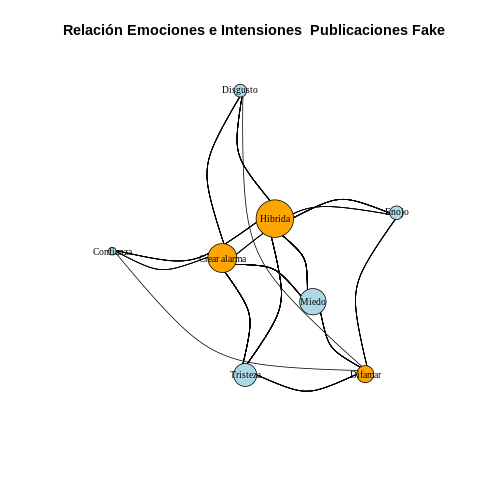

In [189]:
%%R
graf <- graficar(dfFEng,"Publicaciones Fake",0.6)

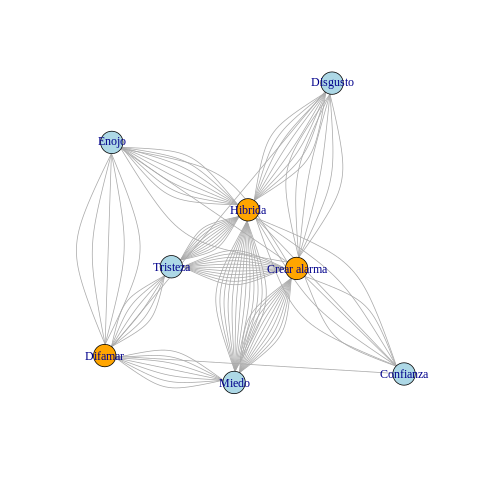

In [172]:
%%R
plot(graf)

In [173]:
%%R
a = estadisticas(graf)

             degree betweenness  closeness autorithy.score eccentricity
Crear alarma     34  3.00641106 0.11111111       0.8300595            2
Difamar          20  0.93674041 0.11111111       0.4943525            2
Hibrida          44  6.05684854 0.11111111       1.0000000            2
Miedo            31  1.32774451 0.09090909       0.7244548            2
Tristeza         27  1.01285664 0.09090909       0.6255337            2
Enojo            16  0.35648703 0.09090909       0.3669374            2
Disgusto         15  0.21632030 0.09090909       0.3814533            2
Confianza         9  0.08659152 0.09090909       0.2260328            2
[1] "----Metricas Generales----"
  mean.distance diameter edge.density transitivity reciprocity
1      1.464286        2          3.5            0           1


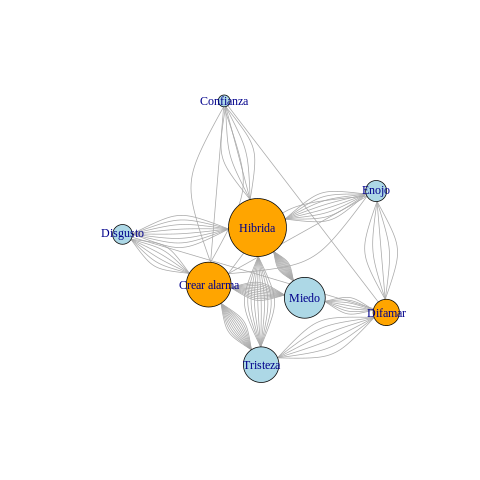

In [190]:
%%R
h=unlist(a['degree'])
plot(graf, vertex.size=h)

### Esp


In [ ]:
%%R
dfFEsp <- bind_rows(coronaFEsp,politicFEsp,gossipFEsp)
dfFEsp = transform(dfFEsp,intentionPercent = as.numeric(intentionPercent))
dfFEsp = dfFEsp[c("intention","emocion","intentionPercent")]
dfFEsp

In [ ]:
%%R
graf <- graficar(dfFEsp,"Publicaciones Fake Esp",1)

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
estadisticas(graf)

# General noFake

## General

### Eng

In [175]:
%%R

dfFEng <- bind_rows(coronaFEng,politicFEng,gossipFEng)
dfFEng = transform(dfFEng,intentionPercent = as.numeric(intentionPercent))
dfFEng = dfFEng[c("intention","emocion","intentionPercent")]
dfFEng

      intention   emocion intentionPercent
1  Crear alarma     Miedo       0.78048780
2  Crear alarma  Tristeza       0.60975610
3  Crear alarma     Enojo       0.31707317
4  Crear alarma     Miedo       0.31707317
5  Crear alarma     Enojo       0.29268293
6  Crear alarma  Tristeza       0.29268293
7  Crear alarma  Disgusto       0.36585366
8  Crear alarma     Miedo       0.36585366
9  Crear alarma  Disgusto       0.36585366
10 Crear alarma  Tristeza       0.36585366
11 Crear alarma     Miedo       0.60975610
12 Crear alarma  Tristeza       0.60975610
13 Crear alarma Confianza       0.26829268
14 Crear alarma     Miedo       0.26829268
15 Crear alarma Confianza       0.26829268
16 Crear alarma  Tristeza       0.26829268
17      Difamar     Miedo       0.33962264
18      Difamar  Tristeza       0.33962264
19      Hibrida     Enojo       0.29729730
20      Hibrida     Miedo       0.29729730
21      Hibrida     Enojo       0.27027027
22      Hibrida  Tristeza       0.27027027
23      Hib

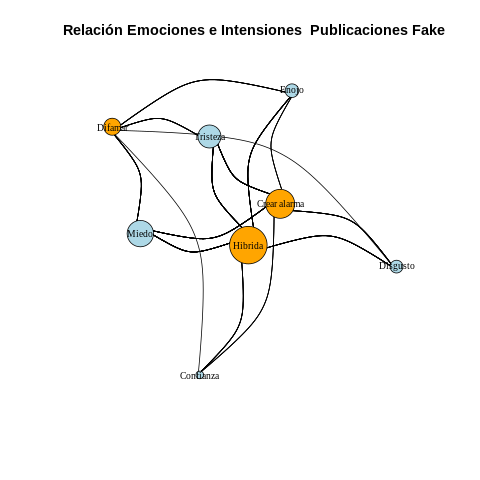

In [176]:
%%R
graf <- graficar(dfFEng,"Publicaciones Fake",0.6)

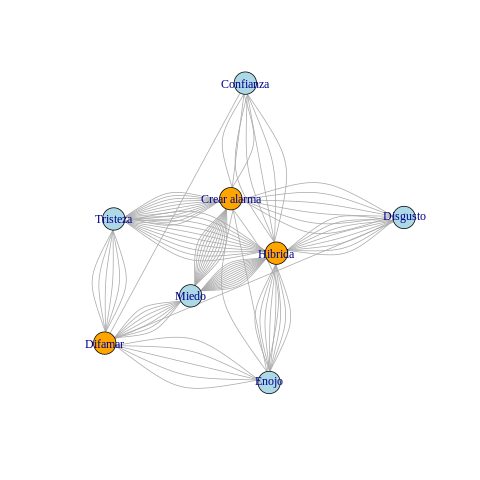

In [177]:
%%R
plot(graf)

In [178]:
%%R
a = estadisticas(graf)

             degree betweenness  closeness autorithy.score eccentricity
Crear alarma     34  3.00641106 0.11111111       0.8300595            2
Difamar          20  0.93674041 0.11111111       0.4943525            2
Hibrida          44  6.05684854 0.11111111       1.0000000            2
Miedo            31  1.32774451 0.09090909       0.7244548            2
Tristeza         27  1.01285664 0.09090909       0.6255337            2
Enojo            16  0.35648703 0.09090909       0.3669374            2
Disgusto         15  0.21632030 0.09090909       0.3814533            2
Confianza         9  0.08659152 0.09090909       0.2260328            2
[1] "----Metricas Generales----"
  mean.distance diameter edge.density transitivity reciprocity
1      1.464286        2          3.5            0           1


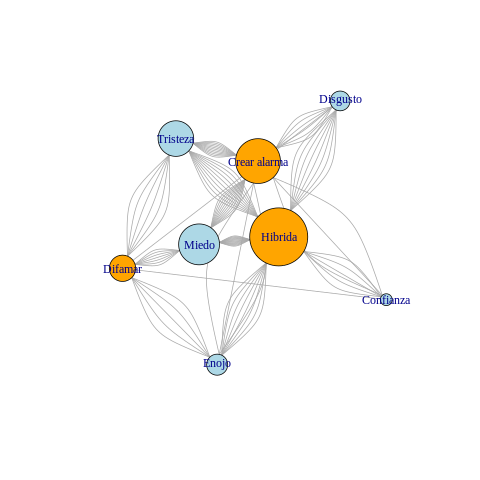

In [179]:
%%R
h=unlist(a['degree'])
plot(graf, vertex.size=h)

### Esp


In [ ]:
%%R
dfFEsp <- bind_rows(coronaFEsp,politicFEsp,gossipFEsp)
dfFEsp = transform(dfFEsp,intentionPercent = as.numeric(intentionPercent))
dfFEsp = dfFEsp[c("intention","emocion","intentionPercent")]
dfFEsp

In [ ]:
%%R
graf <- graficar(dfFEsp,"Publicaciones Fake Esp",1)

In [ ]:
%%R
plot(graf)

In [ ]:
%%R
estadisticas(graf)